In [1]:
%pip install tqdm

  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import os
import re
from tqdm import tqdm
import pickle
import numpy as np
from collections import Counter

# Experimenting

In [ ]:
example = pd.read_pickle("./shared/to_vid/datasets/HolyDataset.pkl")
# shape of data
# x_train = HolyDataset[0]
# x_test = HolyDataset[1]
# y_train = HolyDataset[2]
# y_test = HolyDataset[3]
# labels = HolyDataset[4]

In [22]:
df = pd.read_pickle("./Energy_graph/data/processed/REFIT.pkl")

In [26]:
# go over all datasets take 20% of the households rounded down from each dataset and use them for evaluation and use rest for training
# if only one household is in dataset use it for training
# if two,three,four households are in dataset use one for evaluation and rest for training
# labels potentially useless as we will try to predict all appliances
# let's say bellow 20w device is off and above 20w device is on so in kWh with 8s sampling rate we have 0.00004kWh as threshold 4.4e-05
# time_window stand for rows in dataset so all datasets need to have same sampling rate !!!!
# shape the data as an array of tuples of shape (X_train, X_test, Y_train, Y_test) where X_train is an array of shape (time_widow) and Y_train is an array of shape (time_window) and X_test is an array of shape (time_window) and Y_test is an array of shape (time_window)
for file in os.listdir("./Energy_graph/data/training_data/"):
    if not file.endswith(".pkl"):
        continue
    df = pd.read_pickle("./Energy_graph/data/training_data/" + file)
    print(len(list(df.keys())))

6
6
20
5
1
22
5
1
2
1
1
1


In [30]:
data = pd.read_pickle("./Energy_graph/data/training_data/REFIT.pkl")

In [31]:
data["REFIT_1"]

{'aggregate':                      aggregate
 Time                          
 2013-10-09 13:06:16   0.001162
 2013-10-09 13:06:24   0.001169
 2013-10-09 13:06:32   0.001169
 2013-10-09 13:06:40   0.001200
 2013-10-09 13:06:48   0.001200
 ...                        ...
 2015-07-10 11:56:00   0.000400
 2015-07-10 11:56:08   0.000416
 2015-07-10 11:56:16   0.000402
 2015-07-10 11:56:24   0.000413
 2015-07-10 11:56:32   0.000404
 
 [6003014 rows x 1 columns],
 ' fridge':                        fridge
 Time                         
 2013-10-09 13:06:16  0.000164
 2013-10-09 13:06:24  0.000167
 2013-10-09 13:06:32  0.000167
 2013-10-09 13:06:40  0.000164
 2013-10-09 13:06:48  0.000164
 ...                       ...
 2015-07-10 11:56:00  0.000000
 2015-07-10 11:56:08  0.000000
 2015-07-10 11:56:16  0.000000
 2015-07-10 11:56:24  0.000000
 2015-07-10 11:56:32  0.000000
 
 [6003014 rows x 1 columns],
 ' chest freezer':                       chest freezer
 Time                               
 20

In [32]:
df = data["REFIT_1"]["aggregate"]
for device in data["REFIT_1"]:
    if device == "aggregate":
        continue
    df = pd.concat([df, data["REFIT_1"][device]], axis=1)


,aggregate,fridge,chest freezer,upright freezer,tumble dryer,washing machine,dishwasher,computer site,television site,electric heater
Time,,,,,,,,,,
2013-10-09 13:06:16,0.001162,0.000164,0.0000,0.000153,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:24,0.001169,0.000167,0.0000,0.000153,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:32,0.001169,0.000167,0.0000,0.000153,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:40,0.001200,0.000164,0.0000,0.000151,0.0,0.0,0.0,0.0,0.0,0.000002
2013-10-09 13:06:48,0.001200,0.000164,0.0000,0.000151,0.0,0.0,0.0,0.0,0.0,0.000002
...,...,...,...,...,...,...,...,...,...,...
2015-07-10 11:56:00,0.000400,0.000000,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002
2015-07-10 11:56:08,0.000416,0.000000,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002
2015-07-10 11:56:16,0.000402,0.000000,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002


In [34]:

for c in df.columns:
    if c == "aggregate":
        continue

    df[c] = df[c].apply(lambda x: 1 if x > 4.4e-5 else 0)
    

In [2]:
df = pd.read_pickle("./Energy_graph/data/processed_all.pkl")

In [8]:
df["REDD_3"].head(50)

,aggregate,fridge,waste disposal unit,dish washer,electric furnace,microwave,smoke alarm,washer dryer
2011-04-16 01:11:20-04:00,0.000000,0,0,0,0,0,0,0
2011-04-16 01:11:28-04:00,0.000700,1,0,0,0,0,0,0
2011-04-16 01:11:36-04:00,0.000703,1,0,0,0,0,0,0
2011-04-16 01:11:44-04:00,0.000719,1,0,0,0,0,0,0
2011-04-16 01:11:52-04:00,0.000704,1,0,0,0,0,0,0
2011-04-16 01:12:00-04:00,0.000702,1,0,0,0,0,0,0
2011-04-16 01:12:08-04:00,0.000705,1,0,0,0,0,0,0
2011-04-16 01:12:16-04:00,0.000704,1,0,0,0,0,0,0
2011-04-16 01:12:24-04:00,0.000704,1,0,0,0,0,0,0
2011-04-16 01:12:32-04:00,0.000704,0,0,0,0,0,0,0


In [59]:
time_window = 2550
windows = []
upper_bound = pd.Timedelta(seconds=32)  
for i in range(0, len(df) - time_window, time_window + 1):
    window = df.iloc[i:i + time_window]
    windows.append(window)






In [60]:

windows[0]
count = 0
test = 0

# this constraint can be relaxed in the future for now we will use it to filter out windows that have gaps of more than 32 seconds for eg. in the future if a window has only 1 gap of one minute we can still use that window

for window in windows:
    test += 1
    time_diffs = window.index.to_series().diff().dropna()
    if  (time_diffs <= upper_bound).all():
        count += 1
    # else:
        # continue
        # print(window.index.to_series().diff().dropna().unique())
    # print(len(window.index.to_series().diff().dropna().unique()))

len(windows) - count


556

# Balancing the data

In [80]:
data = pd.read_pickle("./Energy_graph/data/processed_all_values.pkl")


In [93]:


def process_data(df : pd.DataFrame, hours) -> list:
    time_window = int((hours * 60 * 60) / 8) # 12h  
    

    df = df.resample("8S").fillna(method="nearest", limit=4)

    windows = []
    for i in range(0, len(df) - time_window, time_window + 1):
        window = df.iloc[i:i + time_window]
        # how much total time can be missing in the window
        margin = 2
        # check how many gaps are in window
        length = diff = abs((window.index.max() - window.index.min()).total_seconds())

        if length > (hours+2) * 60 * 60:
            print("skipping window with too much missing data Missing: ", length/60/60 - 12 , "h")

            continue

        if length < (hours/2) * 60 * 60:
            print("skipping window with too much missing data Missing: ", length/60/60 - 12 , "h")

            continue

        window.reset_index(drop=True, inplace=True)
        windows.append(window)
    
    return windows
devices_processed = {}
path = "./Energy_graph/data/training_data/"
for dataset in tqdm(os.listdir(path)):
    if not dataset.endswith(".pkl"):
        continue
    # if "HES" not in dataset:
    #     continue
    data = pd.read_pickle(path + dataset)
    print(dataset)
    for house in data:
        for device in data[house]:
            if device == "aggregate":
                continue
            name = preprocess_string(device)
            if name not in devices_processed:
                devices_processed[name] = []
            curr_device = process_data(data[house][device], 24)
            devices_processed[name].extend(curr_device)
    # break        



  8%|▊         | 1/13 [00:00<00:03,  3.73it/s]

IAWE_clean.pkl
SUST2_clean.pkl


 15%|█▌        | 2/13 [00:01<00:06,  1.61it/s]

REFIT_clean.pkl


 23%|██▎       | 3/13 [00:54<04:05, 24.56s/it]

DEDDIAG_clean.pkl


 31%|███       | 4/13 [00:56<02:20, 15.64s/it]

ENERTALK.pkl


 46%|████▌     | 6/13 [02:14<03:16, 28.09s/it]

HES_clean.pkl


 54%|█████▍    | 7/13 [02:15<02:03, 20.59s/it]

ECO_clean.pkl


 62%|██████▏   | 8/13 [02:23<01:25, 17.04s/it]

REDD_clean.pkl


 69%|██████▉   | 9/13 [02:23<00:49, 12.35s/it]

HEART_clean.pkl


 77%|███████▋  | 10/13 [02:25<00:27,  9.13s/it]

DRED_clean.pkl


 85%|████████▍ | 11/13 [02:26<00:13,  6.77s/it]

UKDALE_clean.pkl


100%|██████████| 13/13 [03:16<00:00, 15.10s/it]


In [94]:
for device in devices_processed:
        print(device, len(devices_processed[device]))

devices_processed["kettle"][0]


fridge 7296
ac 308
washing machine 13092
pc 9292
iron 1664
television 15289
motor 36
coffee machine 2701
vacuum cleaner 1714
laptop 2746
toaster 7205
microwave 10998
freezer 6448
handmixer 68
stove oven 96
kettle 9336
fridge freezer 9895
dish washer 11176
tumble dryer 4996
chest freezer 1224
upright freezer 638
electric heater 2292
food mixer 489
vivarium 489
pond pump 489
dryer 932
washer dryer 3003
audio system 3551
router 2607
blender 586
food processor 2179
bread maker 2063
oven extractor fan 617
combination microwave 648
rice cooker 1197
kimchi fridge 1151
water purifier 135
running machine 454
ev 141
air exchanger 141
oven 1797
whirlpool bath 141
towel dryer 141
air exhaust 244
stove 48
stereo 444
tablet 772
fountain 70
electric space heater 141
electric stove 277
electric oven 173
waste disposal unit 121
electric furnace 134
smoke alarm 91
air handling unit 23
minioven 184
monitor 2080
hair dryer 1731
watercooker 184
heater 92
gaming pc 92
radio 146
fan 1337
electric heating ele

,power
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
10795,0.0
10796,0.0
10797,0.0
10798,0.0


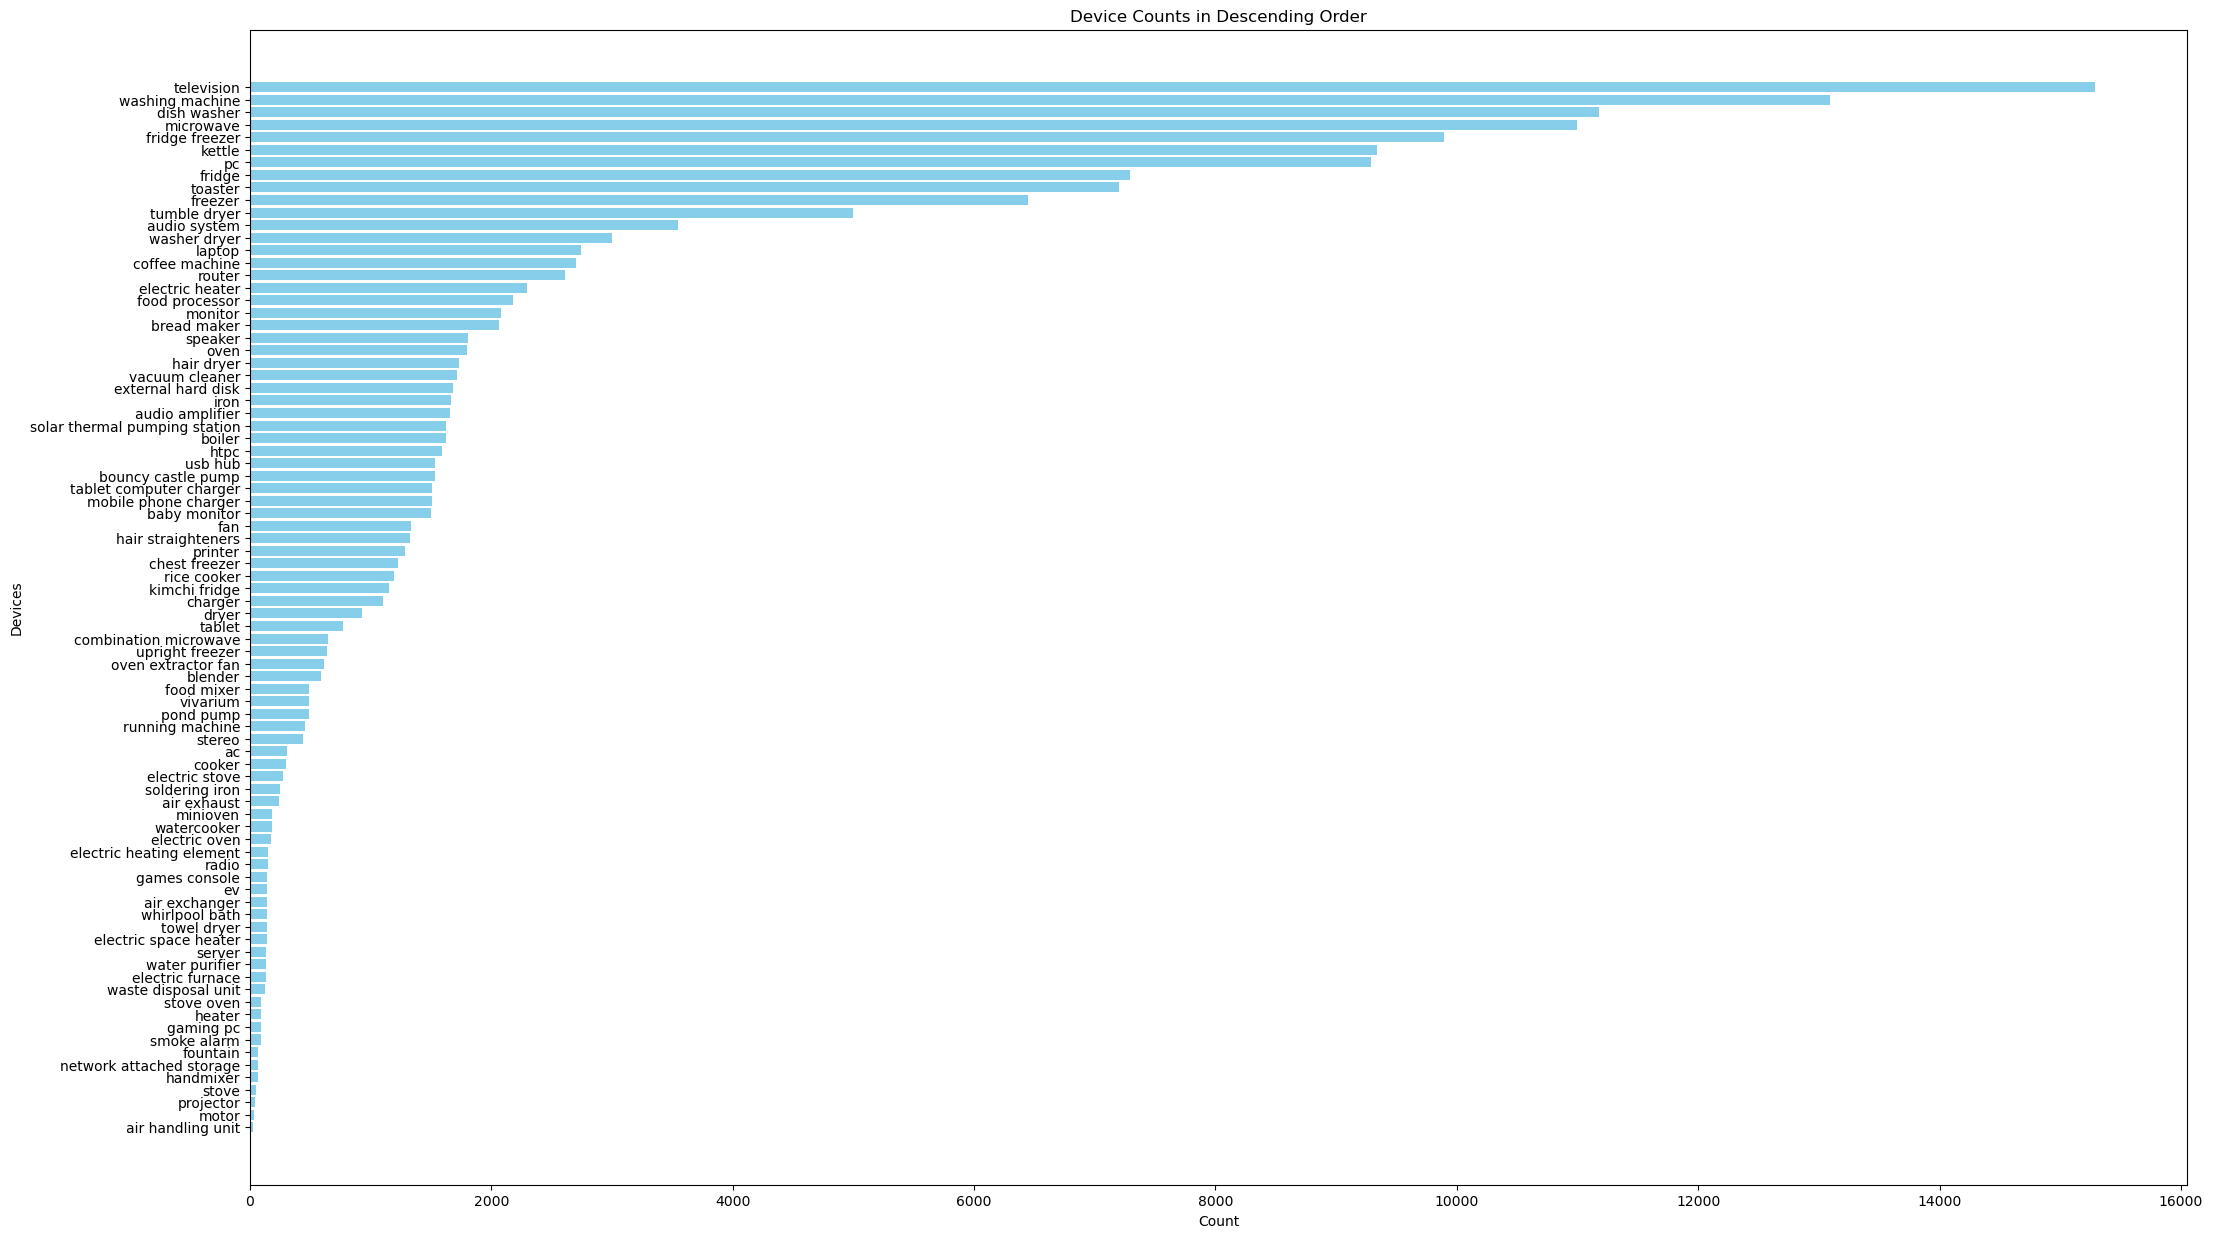

In [95]:
import matplotlib.pyplot as plt

# Extract device names and their lengths
device_names = list(devices_processed.keys())
lengths = [len(devices_processed[device]) for device in device_names]

# Sort them based on lengths in descending order
sorted_indices = sorted(range(len(lengths)), key=lambda k: lengths[k], reverse=True)
sorted_device_names = [device_names[i] for i in sorted_indices]
sorted_lengths = [lengths[i] for i in sorted_indices]

plt.figure(figsize=(25, 15))
# Plotting
plt.barh(sorted_device_names, sorted_lengths, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Devices')
plt.title('Device Counts in Descending Order')
plt.gca().invert_yaxis()  # This is to have the device with the highest count at the top
plt.show()


# Preprocessing

### Functions

In [72]:
def preprocess_string(string : str) -> str:
    string = string.lower().strip()
    string = re.sub(' +', ' ', string)
    string = string.replace("_", " ")
    string = string.replace("-", " ")
    string = string.replace("&", " ")
    string = string.split("(")[0]
    string = string.split("#")[0]

    string = string.strip()

    # handle known synoynms
    synonyms = {
        "refrigerator": "fridge",
        "vaccumcleaner": "vacuum cleaner",
        "breadmaker": "bread maker",
      
        
    }
    if string in synonyms:
        string = synonyms[string]

    if 'hi fi' in string:
        string = "audio system"

    if "router" in string:
        string = "router"

    if "treadmill" in string:
        string = "running machine"
        

    if "laptop" in string:
        string = "laptop"
    
    if "server" in string:
        string = "server"

    if "monitor" in string and not "baby" in string:
        string = "monitor"
    # special cases
    if "computer" in string and "charger" not in string:
        string = "pc"

    if "tv" in string:
        string = "television"

    if "television" in string:
        string = "television"

    if "macbook" in string:
        string = "laptop"
        
    if "car charger" == string:
        string = "ev"
    
    if "toast" in string:
        string = "toaster"
    
    if "modem" in string:
        string = "router"

    # we treat all audio devices as speakers so subwoofer is also a speaker
    if "subwoofer" in string:
        string = "speaker"

    if "speaker" in string:
        string = "speaker"

    if "iron" in string and "soldering" not in string:
        string = "iron"

    
    if "coffeemachine" in string:
        string = "coffee machine"
    if "coffee maker" in string:
        string = "coffee machine"

    if "dishwasher" in string:
        string = "dish washer"
    if "air conditioner" in string:
        string = "ac"

    if "air conditioning" in string:
        string = "ac"
    
    string = re.sub(' +', ' ', string)
    string = re.sub(r'\d+', '', string)
    return string.strip()


def process_dictionary(data: dict) -> pd.DataFrame:

    ignored_devices = [
        "light",
        "outlet",
        "sockets",
        "lamp",
        "plug",
        'CE appliance'
        'kettle/toaster',
        'dehumidifier/heater',
        'HairDryer-Straightener',
        'Office Desk',
        'heat basement',
        'set top box',
        'subpanel',
    ]
    dfs = []

    for device in data:
        # ignore devices
        if any(ignored_device in device.lower() for ignored_device in ignored_devices):
            continue
        # preprocess device name
        
        device_name = preprocess_string(device)
        df = data[device]
        # rename column to standardized device name
        df.columns = [device_name]

        time_diffs = df.index.to_series().diff()
        median_interval = time_diffs.median()

        # if there is less than 5 days of data drop the device
        if len(df) < (5*24 * 60 * 60) / median_interval.total_seconds():
            print("less than 5 days of data for device: ", device_name)
            continue
        dfs.append(df)

    # concatenate all dataframes
    df = pd.concat(dfs, axis=1)

    # resample to 8s
    df = df.resample("8s").fillna(method="nearest", limit=2)

    # check for gaps in data TODO do this in 

    # drop rows with NaN values
    df.dropna(inplace=True)

    # put 1 if device is on and 0 if device is off
    for c in df.columns:
        if c == "aggregate":
            continue

        df[c] = (df[c] > 4.4e-5).astype(int)

    column_counts = Counter(df.columns)
    duplicates = [col for col, count in column_counts.items() if count > 1]
    # Sum duplicate columns
    for duplicate in duplicates:
        duplicate_cols = [col for i, col in enumerate(df.columns) if col == duplicate]
        df[duplicate] = df[duplicate_cols].sum(axis=1)
        # Drop other duplicate columns if needed
        df = df.loc[:, ~df.columns.duplicated(keep='last')]
    
    
    return df
    


def process_dataset(dataset_path):
    data = pd.read_pickle(dataset_path)
    
    for house in data:
        data[house] = process_dictionary(data[house])
        
    return data








        


### Processing

In [ ]:

# Serial code
path = "./Energy_graph/data/training_data/"
processed_data = {}
for dataset in tqdm(os.listdir(path)):
    if not dataset.endswith(".pkl"):
        continue
    
    data = pd.read_pickle(path + dataset)

    print("processing dataset: ", dataset)
    for house in data:
        data[house] = process_dictionary(data[house])

    processed_data.update(data)
    
    

In [73]:
import concurrent.futures
import multiprocessing

path = "./Energy_graph/data/training_data/"
dataset_paths = [os.path.join(path, dataset) for dataset in os.listdir(path) if dataset.endswith('.pkl')]
    
cpu_count = int(os.cpu_count() / 2)
data_dict = {}

with tqdm(total=len(dataset_paths), desc="Processing datasets", unit="dataset") as progress_bar:
    with concurrent.futures.ProcessPoolExecutor(max_workers=cpu_count) as executor:
        futures = {executor.submit(process_dataset, dataset_path): dataset_path for dataset_path in dataset_paths}
        
        for future in concurrent.futures.as_completed(futures):
            dataset_path = futures[future]
            try:
                processed_data = future.result()
                data_dict.update(processed_data)
            except Exception as e:
                print(f"Dataset {dataset_path} generated an exception: {e}")
            
            progress_bar.update(1)


Processing datasets:   0%|          | 0/11 [00:00<?, ?dataset/s]

less than 5 days of data for device:  washing machine
less than 5 days of data for device:  iron
less than 5 days of data for device:  television


Processing datasets:  27%|██▋       | 3/11 [00:25<00:46,  5.76s/dataset]

less than 5 days of data for device:  games console


Processing datasets:  55%|█████▍    | 6/11 [00:54<00:52, 10.48s/dataset]

less than 5 days of data for device:  iron
less than 5 days of data for device:  hair straighteners


Processing datasets: 100%|██████████| 11/11 [07:50<00:00, 42.80s/dataset] 


In [76]:
data_dict.keys()

dict_keys(['REDD_1', 'REDD_2', 'REDD_3', 'REDD_4', 'REDD_5', 'REDD_6', 'HES_1', 'DRED_1', 'DEKN_2', 'DEKN_4', 'DEKN_1', 'DEKN_6', 'DEKN_3', 'HEART_33', 'HEART_7', 'IAWE_1', 'SUST2_1', 'REFIT_13', 'REFIT_6', 'REFIT_1', 'REFIT_21', 'REFIT_8', 'REFIT_9', 'REFIT_20', 'REFIT_7', 'REFIT_15', 'REFIT_12', 'REFIT_4', 'REFIT_3', 'REFIT_18', 'REFIT_11', 'REFIT_16', 'REFIT_17', 'REFIT_10', 'REFIT_19', 'REFIT_2', 'REFIT_5', 'DEDDIAG_8', 'ECO_1', 'ECO_6', 'ECO_2', 'ECO_5', 'ECO_4', 'ECO_3', 'ENERTALK_1', 'ENERTALK_18', 'ENERTALK_12', 'ENERTALK_20', 'ENERTALK_15', 'ENERTALK_6', 'ENERTALK_8', 'ENERTALK_2', 'ENERTALK_11', 'ENERTALK_16', 'ENERTALK_5', 'ENERTALK_7', 'ENERTALK_14', 'ENERTALK_13', 'ENERTALK_19', 'ENERTALK_21', 'ENERTALK_0', 'ENERTALK_4', 'ENERTALK_17', 'ENERTALK_10', 'ENERTALK_3', 'ENERTALK_9', 'UKDALE_5', 'UKDALE_2', 'UKDALE_1', 'UKDALE_3'])

In [74]:
#  save to pickle
with open("./Energy_graph/data/processed_all.pkl", "wb") as f:
    pickle.dump(data_dict, f, pickle.HIGHEST_PROTOCOL)
    


In [75]:
data = pd.read_pickle("./Energy_graph/data/processed_all.pkl")
labels = pd.read_pickle("./Energy_graph/labeles.pkl")
labels


['fridge',
 'ac',
 'washing machine',
 'pc',
 'iron',
 'television',
 'motor',
 'coffee machine',
 'vacuum cleaner',
 'laptop',
 'toaster',
 'microwave',
 'freezer',
 'handmixer',
 'stove oven',
 'kettle',
 'fridge freezer',
 'dish washer',
 'tumble dryer',
 'chest freezer',
 'upright freezer',
 'electric heater',
 'food mixer',
 'vivarium',
 'pond pump',
 'dryer',
 'washer dryer',
 'audio system',
 'router',
 'blender',
 'food processor',
 'bread maker',
 'oven extractor fan',
 'combination microwave',
 'rice cooker',
 'kimchi fridge',
 'water purifier',
 'running machine',
 'ev',
 'air exchanger',
 'oven',
 'whirlpool bath',
 'towel dryer',
 'air exhaust',
 'stove',
 'stereo',
 'tablet',
 'fountain',
 'electric space heater',
 'electric stove',
 'electric oven',
 'waste disposal unit',
 'electric furnace',
 'smoke alarm',
 'air handling unit',
 'minioven',
 'monitor',
 'hair dryer',
 'watercooker',
 'heater',
 'gaming pc',
 'radio',
 'fan',
 'electric heating element',
 'cooker',
 's

In [76]:
# to ensure the order of the labels is always the same
labels.sort()

In [80]:
data["REDD_1"]

,aggregate,refrigerator,dishwasher,microwave,electric space heater,electric oven,washer dryer
2011-04-18 09:22:16-04:00,0.000864,0,0,0,0,0,0
2011-04-18 09:22:24-04:00,0.000865,0,0,0,0,0,0
2011-04-18 09:22:32-04:00,0.000867,0,0,0,0,0,0
2011-04-18 09:22:40-04:00,0.000884,0,0,0,0,0,0
2011-04-18 09:22:48-04:00,0.000868,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2011-05-24 15:55:52-04:00,0.000933,1,0,0,0,0,0
2011-05-24 15:56:00-04:00,0.000916,1,0,0,0,0,0
2011-05-24 15:56:08-04:00,0.000912,1,0,0,0,0,0
2011-05-24 15:56:16-04:00,0.000916,1,0,0,0,0,0


In [77]:
time_window = 2550 # this is rows so 2550 * 8s = 5h35m
windows = []
upper_bound = pd.Timedelta(seconds=32)
max_gap = pd.Timedelta(seconds=3600)
X_Y = [] # list of tuples (X, Y)
skip_count_1 = 0
skip_count_2 = 0
total_count = 0

for df in tqdm(data.values()):
    for i in range(0, len(df) - time_window, time_window + 1):
        window = df.iloc[i:i + time_window]
        total_count += 1
        # if there is a gap of more than 30 min or 15 gaps of 32 seconds or more in the window skip it
        time_diffs = window.index.to_series().diff().dropna()
        if  (time_diffs >= max_gap).any():
            skip_count_1 += 1
            continue
        if len(time_diffs[time_diffs > upper_bound]) > 15:
            # print(len(time_diffs[time_diffs > upper_bound]))
            skip_count_2 += 1
            continue
        x = window["aggregate"].values
        devices = [False] * len(labels)
        for c in window.columns:
            if c == "aggregate":
                continue
            on = (window[c] > 0)
            ix = labels.index(c)
            # print(window[c])
            # print(on.any())
            devices[ix] = on.any()

        X_Y.append((x, devices))
        


        windows.append(window)
    # break

# X_Y[9][1].count(False)
print("Total windows: ", total_count, "Skipped windows due to 30min gap: ", skip_count_1, "Skipped windows due to 4 gaps of 32s or more: ", skip_count_2 ,"Procentage skipped: ", (skip_count_1+skip_count_2) / total_count * 100)


100%|██████████| 65/65 [01:19<00:00,  1.23s/it]

Total windows:  51397 Skipped windows due to 30min gap:  663 Skipped windows due to 4 gaps of 32s or more:  211 Procentage skipped:  1.7004883553514796


In [78]:
len(labels)

84

In [79]:
# save to pickle
with open("./Energy_graph/data/processed_all_X_Y.pkl", "wb") as f:
    pickle.dump(X_Y, f, pickle.HIGHEST_PROTOCOL)